# Prediction using Unsupervised ML

## Author: Samruddhi Nabriya

**Objective**: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset : https://bit.ly/3kXTdox

Task:Classify the various species


# 1.Importing libraries and  the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
pd.read_csv("Iris.csv")

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]

In [10]:
datas = pd.read_csv("iris.csv")


# 2. Visualizing the data

In [11]:
data.sample(10)

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
87    88            6.3           2.3            4.4           1.3   
69    70            5.6           2.5            3.9           1.1   
134  135            6.1           2.6            5.6           1.4   
125  126            7.2           3.2            6.0           1.8   
8      9            4.4           2.9            1.4           0.2   
120  121            6.9           3.2            5.7           2.3   
51    52            6.4           3.2            4.5           1.5   
59    60            5.2           2.7            3.9           1.4   
70    71            5.9           3.2            4.8           1.8   
99   100            5.7           2.8            4.1           1.3   

             Species  
87   Iris-versicolor  
69   Iris-versicolor  
134   Iris-virginica  
125   Iris-virginica  
8        Iris-setosa  
120   Iris-virginica  
51   Iris-versicolor  
59   Iris-versicolor  
70   Iris-versicolor  
99   Iris-versicolor

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
data.shape

(150, 6)

In [22]:
data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [26]:
#we will now drop the label column as its unsupervised learning 
iris=pd.DataFrame(data)
iris_df=iris.drop(columns=['Species','Id'])
iris_df.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

# 3. Finding the optimum number of clusters
We need to specify the number of clusters before clustering the data using kmeans.The Elbow method is used here.

In elbow method, the number of clusters varies within a certain range. For each number, within-cluster sum of square (wss) value is calculated and stored in a list. Then, these values are plotted against the range of number of clusters.The location of point from where the curve decreases in a linear manner in the 2d plot indicates the appropiate number of clusters.

In [34]:
#Calculating the within-cluster sum of square
within_cluster_sum_of_square= []

clusters_range=range(1,10)
for k in clusters_range:
    km=KMeans(n_clusters=k)
    km=km.fit(iris_df)
    within_cluster_sum_of_square.append(km.inertia_)
    

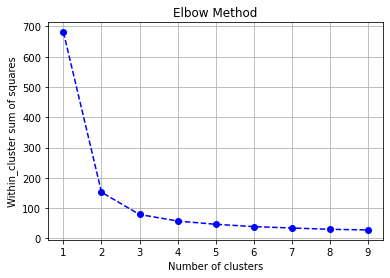

In [85]:
#Plotting the wss against clusters range
plt.plot(clusters_range,within_cluster_sum_of_square,'bo--',color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Within_cluster sum of squares')
plt.title('Elbow Method')
plt.grid()
plt.show()

'The Elbow Method' of graphical representation shows that the optimum clusters is where the elbow occurs. This is the point when within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

Therefore, from the above graph the optimal number of clusters to be 3.

# 4.Applying K means clustering on the data

In [59]:

model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

# 5.Visualising the clusters

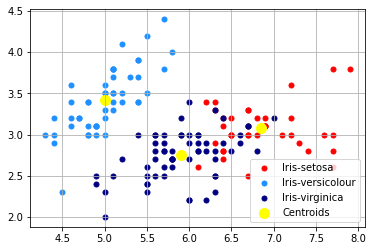

In [75]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'dodgerblue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'navy', label = 'Iris-virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()

plt.show()


In [77]:
#This will tell us which cluster the data observation belongs to

new_labels = model.labels_
new_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# 6.Make prediction

In [87]:
#Testing for prediction with some random values for features, predicting the species

sample_test=np.array([7.0,4.0,2.0,5.2])
second_test=sample_test.reshape(1, -1)
model.predict(second_test)

array([2])

In [ ]:
#The End Thank you